# Case Study on Probability for Data Science
 ### Problem Statement: 
 To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
class_type = data['class'].unique()
class_type

array(['p', 'e'], dtype=object)

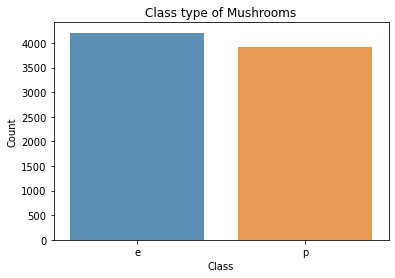

In [6]:
count = data['class'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(count.index,count.values,alpha=0.8)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Class',fontsize=10)
plt.title('Class type of Mushrooms')
plt.show()

From the graph above, we can clearly see that there are more edible mushrooms than poisonous ones in the given dataset.

### Data Pre-processing

Since all the features are of object type, we need to convert them to integer type using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
for column in data.columns:
    data[column] = labelEncoder.fit_transform(data[column])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

<AxesSubplot:>

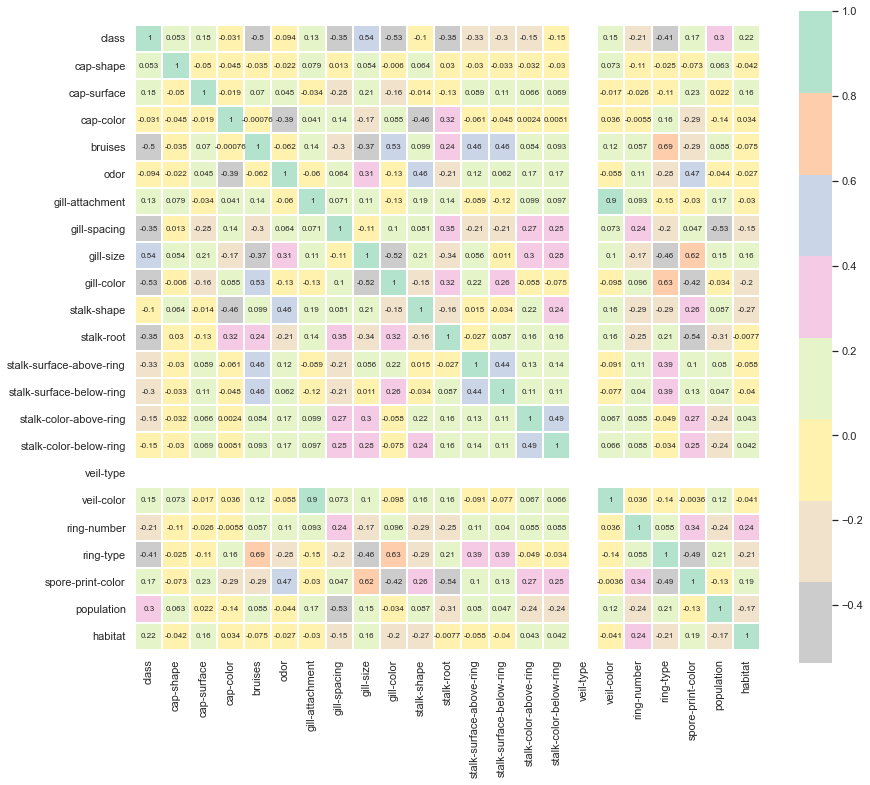

In [9]:
#correlation heat map
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), annot=True,annot_kws={"size":8}, linewidths=1, square=True, cmap="Pastel2_r")

Here, we can see that there is no relevant data in the column 'veil-type', hence we can drop the column.

In [10]:
data.drop(['veil-type'],axis = 1,inplace=True)

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Different types of ML models

### 1. Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(['class'], axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[843   0]
 [  0 782]]


There are no false values in the confusion matrix that we got here, which indicates that it is a perfect model.

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [15]:
print('Accuracy on Random Forest model is : ',accuracy_score(y_test, y_pred))

Accuracy on Random Forest model is :  1.0


Insight :-

    We can see that we are getting the accuracy as 1 which is the highest value indicating the model is 100% accurate, which says that the data set is very accurate and ideal.

### 2. Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print ("Accuracy on Decision Tree model is ",accuracy_score(y_test,y_pred))

[[843   0]
 [  0 782]]
Accuracy on Decision Tree model is  1.0


Insight :-

    Here also we can see that we are getting the accuracy as 1 which is the highest value indicating the model is 100% accurate,and there are no false predictions as seen in the confusion_matrix which says that the data set is very accurate and ideal.

### 3. SVM Classifier

In [17]:
from sklearn.svm import SVC

svc = SVC(random_state=42, gamma = "auto")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy on SVM Classifier model is :",accuracy_score(y_pred,y_test))

[[843   0]
 [  0 782]]
Accuracy on SVM Classifier model is : 1.0


Insight :-

    Here also we can see that we are getting the accuracy as 1 which is the highest value indicating the model is 100% accurate,and there are no false predictions as seen in the confusion_matrix which says that the data set is very accurate and ideal.

## Probability Prediction

### Naive Bayes Classification

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy on Gaussian Naive Bayes model is :",accuracy_score(y_pred,y_test))

Accuracy on Gaussian Naive Bayes model is : 0.9218461538461539


Insight :
    
    Here we can see that for the probability prediction model the accuracy is only 92%.

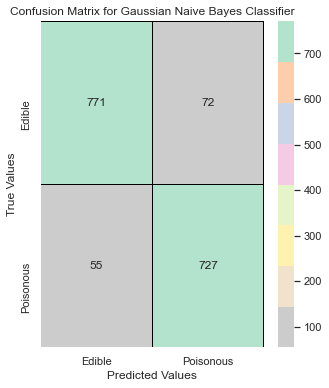

In [19]:
#Confusion Matrix for GNB classifier
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(5,6))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

In the confusion matrix, we can see that there are some false predictions (grey fields), which has reduced the accuracy of the model prediction

In [20]:
#Using Bernoulli's Classifier

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)

print('Accuracy of BNB Classifier is :',accuracy_score(y_test,y_pred))

Accuracy of BNB Classifier is : 0.8418461538461538


Insight :
   
   Here we can see that using Bernoulli's classifier model the probability prediction is even more less which is only 84%.

### Conclusion

From the above probability prediction modelling we can say that Gaussian Naive Bayes' classifier is providing better prediction compared to Bernoulli classifier with an accuracy of 92%. 

Whereas, we can also see that other ML modelling were perfect with 100% of accuracy.